
isSub =

     1


isSub =

     2


isSub =

     3


isSub =

     4


isSub =

     5


isSub =

     6


isSub =

     7


isSub =

     8


isSub =

     9


isSub =

    10


isSub =

    11


isSub =

    12


isSub =

    13


isSub =

    14


isSub =

    15


isSub =

    16


isSub =

    17


isSub =

    18


isSub =

    19


isSub =

    20




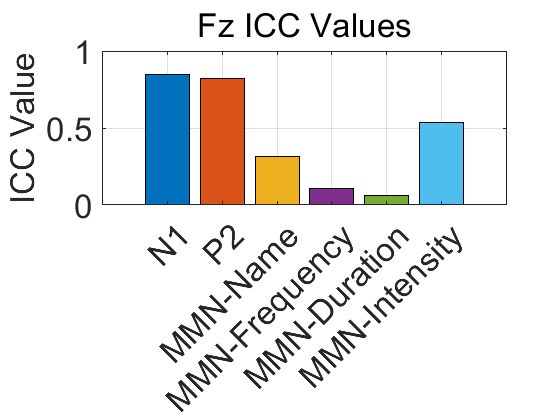

In [1]:
clc
clear
close all
tic
%%
Pathname = ['D:\dataset\健康人数据' filesep 'data_64'] ;
Listing = dir(Pathname) ;
filename = {Listing(3:end).name}' ;
% 获取文件名并使用natsort进行排序
filename = natsort(filename);
Fz=6;
time=linspace(-100,600,350);
for isSub =1:20
    isSub
    Pathname1 = [Pathname filesep filename{isSub}] ;
    Listing1 = dir(Pathname1) ;
    filename1 = {Listing1(3:end).name}' ;
    
    STD= zeros(3,61,350);
    STD_fre= zeros(3,61,350);
    STD_name= zeros(3,61,350);
    STD_time= zeros(3,61,350);
    STD_In= zeros(3,61,350);
    
    DEV_Fre= zeros(3,61,350);
    DEV_name= zeros(3,61,350);
    DEV_time= zeros(3,61,350);
    DEV_In= zeros(3,61,350);
    
    Fre_DI= zeros(3,61,350);
    Name_DI= zeros(3,61,350);
    Time_DI= zeros(3,61,350);
    In_DI= zeros(3,61,350);
    for days=1:3
        Data=load( [Pathname1 filesep filename1{days} filesep 'epoched.mat'] );
        names = fieldnames(Data);
        channel=Data.channel;
        STD(days,:,:)= squeeze(mean(Data.STD,3));
        STD_fre(days,:,:)=squeeze(mean(Data.STD_fre,3));
        STD_name(days,:,:)=squeeze(mean(Data.STD_name,3));
        STD_time(days,:,:)=squeeze(mean(Data.STD_time,3));
        STD_In(days,:,:)=squeeze(mean(Data.STD_In,3));
        
        DEV_Fre(days,:,:) = squeeze(mean(Data.DEV_Fre,3));
        DEV_name(days,:,:) = squeeze(mean(Data.DEV_name,3));
        DEV_time(days,:,:)= squeeze(mean(Data.DEV_time,3));
        DEV_In(days,:,:) = squeeze(mean(Data.DEV_In,3));
        
        Fre_DI(days,:,:) = DEV_Fre(days,:,:) - STD_fre(days,:,:) ;
        Name_DI(days,:,:) = DEV_name(days,:,:) - STD_name(days,:,:) ;
        Time_DI(days,:,:) = DEV_time(days,:,:)- STD_time(days,:,:) ;
        In_DI(days,:,:) = DEV_In(days,:,:) - STD_In(days,:,:) ;
        %% N1
        [pks,peak_locs,w,p] = findpeaks(-squeeze(STD(days,Fz,90:126)));%选择80-150ms内的数
        if isempty(pks)
            [pks,peak_locs,w,p] = findpeaks(-squeeze(STD(days,Fz,60:145)));
            [max_peak_num,max_peak_loc] = max(pks);
            location_in_x_N1(isSub,days) =peak_locs(max_peak_loc)+60;
        else
        end
        [max_peak_num,max_peak_loc] = max(pks);
        location_in_x_N1(isSub,days) =peak_locs(max_peak_loc)+90;
        peak_time_1=location_in_x_N1(isSub,days)-10;
        peak_time_2=location_in_x_N1(isSub,days)+10;
        %amp_N1(isSub,days)=max(pks);%单个峰值
        amp_N1(isSub,days)=squeeze(mean(STD(days,Fz, peak_time_1:peak_time_2),3));%周围20个数的均值
        %     location_in_x_N1(isSub,days) = find(-squeeze(STD(days,Cz,:))==max_peak_num);
        peak_time_N1(isSub,days)=time(1,location_in_x_N1(isSub,days));
        % peak_time_N1(isSub,days)=location_in_x_N1(isSub,days);
        %fill([peak_time(1,isSub)-10 peak_time(1,isSub)-10 peak_time(1,isSub)+10  peak_time(1,isSub)+10],[-6 6 6 -6],[0.8,1,0.58])%第一个括号是x轴，第二个是y轴
        %% P2
        [pks,peak_locs,w,p] = findpeaks(squeeze(STD(days,Fz,111:201)));%P3a为120-300ms的最大正峰值
        if isempty(pks)
            [pks,peak_locs,w,p] = findpeaks(squeeze(STD(days,Fz,101:211)));
            [max_peak_num,max_peak_loc] = max(pks);
            location_in_x_P2(isSub,days)=peak_locs(max_peak_loc)+101;
        else
            [max_peak_num,max_peak_loc] = max(pks);
            location_in_x_P2(isSub,days)=peak_locs(max_peak_loc)+111;
        end
        %amp_P2(isSub,days)=max(pks);
        amp_P2(isSub,days)=squeeze(mean(STD(days,Fz,location_in_x_P2(isSub,days)-10:location_in_x_P2(isSub,days)+10),3));
        %  amp_P2(isSub,days,:)=squeeze(STD(days,Fz,location_in_x_P2(isSub,days)-5:location_in_x_P2(isSub,days)+5));
        peak_time_P2(isSub,days)=time(1,location_in_x_P2(isSub,days))/1000;
        %peak_time_P2(isSub,days)=location_in_x_P2(isSub,days);
        %% MMN_Name
        [pks,peak_locs,w,p] = findpeaks(squeeze(-Name_DI(days,Fz,108:176)));%P3a为115-250ms的最大正峰值
        if isempty(pks)
            [pks,peak_locs,w,p] = findpeaks(squeeze(-Name_DI(days,Fz,78:206)));
            [max_peak_num,max_peak_loc] = max(pks);
            location_in_Name_MMN(isSub,days)=peak_locs(max_peak_loc)+78;
        else
            [max_peak_num,max_peak_loc] = max(pks);
            location_in_Name_MMN(isSub,days)=   peak_locs(max_peak_loc)+108;
        end
        %amp_MMN_Name(isSub,days)=max(pks);
        amp_MMN_Name(isSub,days)=squeeze(mean(Name_DI(days,Fz,location_in_Name_MMN(isSub,days)-10:location_in_Name_MMN(isSub,days)+10),3));
        % location_in_Name_MMN(isSub,days) = find(squeeze(-Name_DI(days,Cz,:))==max_peak_num);
        peak_time_MMN_Name(isSub,days)=time(1,location_in_Name_MMN(isSub,days));
        %peak_time_MMN_Name(isSub,days)=location_in_Name_MMN(isSub,days);
        %% MMN_Fre
        [pks,peak_locs,w,p] = findpeaks(squeeze(-Fre_DI(days,Fz,108:176)));%P3a为115-250ms的最大正峰值
        if isempty(pks)
            [pks,peak_locs,w,p] = findpeaks(squeeze(-Fre_DI(days,Fz,78:196)));
            [max_peak_num,max_peak_loc] = max(pks);
            location_in_Fre_MMN(isSub,days)=peak_locs(max_peak_loc)+78;
        else
            [max_peak_num,max_peak_loc] = max(pks);
            location_in_Fre_MMN(isSub,days)=peak_locs(max_peak_loc)+108;
        end
        %amp_MMN_Fre(isSub,days)=max(pks);
        amp_MMN_Fre(isSub,days)=squeeze(mean(Fre_DI(days,Fz,location_in_Fre_MMN(isSub,days)-10:location_in_Fre_MMN(isSub,days)+10),3));
        peak_time_MMN_Fre(isSub,days)=time(1,location_in_Fre_MMN(isSub,days));
        %peak_time_MMN_Fre(isSub,days)=location_in_Fre_MMN(isSub,days);
        %% MMN_duration
        [pks,peak_locs,w,p] = findpeaks(squeeze(-Time_DI(days,Fz,108:176)));%P3a为115-250ms的最大正峰值
        if isempty(pks)
            [pks,peak_locs,w,p] = findpeaks(squeeze(-Time_DI(days,Fz,88:196)));
            [max_peak_num,max_peak_loc] = max(pks);
            location_in_Time_MMN(isSub,days)=peak_locs(max_peak_loc)+88;
        else
            [max_peak_num,max_peak_loc] = max(pks);
            location_in_Time_MMN(isSub,days)=peak_locs(max_peak_loc)+108;
        end
        %amp_MMN_Time(isSub,days)=max(pks);
        amp_MMN_Time(isSub,days)=squeeze(mean(Time_DI(days,Fz,location_in_Time_MMN(isSub,days)-10:location_in_Time_MMN(isSub,days)+10),3));
        peak_time_MMN_Time(isSub,days)=time(1,location_in_Time_MMN(isSub,days));
        %peak_time_MMN_Time(isSub,days)=location_in_Time_MMN(isSub,days);
        %% MMN_In
        [pks,peak_locs,w,p] = findpeaks(squeeze(-In_DI(days,Fz,108:176)));%P3a为115-250ms的最大正峰值
        if isempty(pks)
            [pks,peak_locs,w,p] = findpeaks(squeeze(-In_DI(days,Fz,78:196)));
            [max_peak_num,max_peak_loc] = max(pks);
            location_in_In_MMN(isSub,days)=peak_locs(max_peak_loc)+78;
        else
            [max_peak_num,max_peak_loc] = max(pks);
            location_in_In_MMN(isSub,days)=peak_locs(max_peak_loc)+108;
        end
        %amp_MMN_In(isSub,days)= max(pks);
        amp_MMN_In(isSub,days)=squeeze(mean(In_DI(days,Fz,location_in_In_MMN(isSub,days)-10:location_in_In_MMN(isSub,days)+10),3));
        peak_time_MMN_In(isSub,days)=time(1,location_in_In_MMN(isSub,days));
        %peak_time_MMN_In(isSub,days)=location_in_In_MMN(isSub,days);
    end
end
%fileDir=['D:\dataset\健康人数据'];
%savepath=strcat(fileDir,'\amp_lat');%拼接路径和文件名
%save(savepath,'amp_N1','amp_P2','peak_time_N1','peak_time_P2','amp_MMN_Name','amp_MMN_Fre','amp_MMN_Time',...
%    'amp_MMN_In','peak_time_MMN_Name','peak_time_MMN_Fre','peak_time_MMN_Time');
[icc_peaks_N1,LB_NP, UB_NP, F_13, df1_13, df2_13, p_13] = ICC([squeeze(amp_N1(:,1)),squeeze(amp_N1(:,2)),...
    squeeze(amp_N1(:,3))], 'A-k');
[icc_peaks_P2,LB_P2P, UB_P2P, F_13, df1_13, df2_13, p_13] = ICC([squeeze(amp_P2(:,1)),squeeze(amp_P2(:,2)),...
    squeeze(amp_P2(:,3))], 'A-k');
[icc_peaks_MMN_Name,LB_MMN_NameP, UB_MMN_NameP, F_13, df1_13, df2_13, p_13] = ICC([squeeze(amp_MMN_Name(:,1)),...
    squeeze(amp_MMN_Name(:,2)),squeeze(amp_MMN_Name(:,3))], 'A-k');
[icc_peaks_MMN_Fre,LB_MMN_FreP, UB_MMN_FreP, F_13, df1_13, df2_13, p_13] = ICC([squeeze(amp_MMN_Fre(:,1)),...
    squeeze(amp_MMN_Fre(:,2)),squeeze(amp_MMN_Fre(:,3))], 'A-k');
[icc_peaks_MMN_Time,LB_MMN_TimeP, UB_MMN_TimeP, F_13, df1_13, df2_13, p_13] = ICC([squeeze(amp_MMN_Time(:,1)),...
    squeeze(amp_MMN_Time(:,2)),squeeze(amp_MMN_Time(:,3))], 'A-k');
[icc_peaks_MMN_In,LB_MMN_InP, UB_MMN_InP, F_13, df1_13, df2_13, p_13] = ICC([squeeze(amp_MMN_In(:,1)),...
    squeeze(amp_MMN_In(:,2)),squeeze(amp_MMN_In(:,3))], 'A-k');
%% ICC可视化
icc_values = [icc_peaks_N1, icc_peaks_P2, icc_peaks_MMN_Name, icc_peaks_MMN_Fre, icc_peaks_MMN_Time, icc_peaks_MMN_In];
icc_labels = {'N1', 'P2', 'MMN-Name', 'MMN-Frequency', 'MMN-Duration', 'MMN-Intensity'};
% Define the lower and upper bounds for the ICC values
lb_values = [LB_NP, LB_P2P, LB_MMN_NameP, LB_MMN_FreP, LB_MMN_TimeP, LB_MMN_InP];
ub_values = [UB_NP, UB_P2P, UB_MMN_NameP, UB_MMN_FreP, UB_MMN_TimeP, UB_MMN_InP];
% Create a figure
figure;
% Create a bar plot with different colors for each ICC value
b=bar(icc_values, 'FaceColor', 'flat');
% Define colors for each bar
colors = [0 0.4470 0.7410;  % blue
    0.8500 0.3250 0.0980;  % red
    0.9290 0.6940 0.1250;  % yellow
    0.4940 0.1840 0.5560;  % purple
    0.4660 0.6740 0.1880;  % green
    0.3010 0.7450 0.9330]; % light blue
% Apply colors to the bars
for k = 1:length(icc_values)
    b.CData(k,:) = colors(k,:);
end
% Add error bars
hold on;
%置信区间
% er = errorbar(1:length(icc_values), icc_values, icc_values - lb_values, ub_values - icc_values, 'k','LineWidth', 2);
hold off;
% Set the x-axis labels
set(gca, 'XTickLabel', icc_labels,'fontsize',25);
% Add title and labels
title(' Fz ICC Values ','fontsize',25);
ylabel('ICC Value','fontsize',25);
% Display the plot
grid on;